In [1]:
import pandas as pd
import numpy as np
import re as re
import os
import sys

In [2]:
from tempfile import mkstemp
from shutil import move
from os import fdopen, remove

def replace(file_path, pattern, subst):
    """
    Replace strings in a file.
    
    Parametrs:
        pattern (str, iterable): pattern to replace.
        subst (str, iterable): subtitution.
    
    """
    #Create temp file
    fh, abs_path = mkstemp()
    with fdopen(fh,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

In [4]:
print("8.0 8.0 8.0"  + " 8.0 8.0 8.0" + " 4.0 4.0 4.0" + " 2.0 2.0 2.0" + " 1.0 1.0 1.0" + " 1.0 1.0 1.0")

8.0 8.0 8.0 8.0 8.0 8.0 4.0 4.0 4.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0


In [18]:
parameters_path = 'Parameters/BSpline.txt'  
replace(parameters_path, '(FinalGridSpacingInPhysicalUnits 30.0 30.0 30.0)', '(FinalGridSpacingInPhysicalUnits 20.0 20.0 20.0)')
replace(parameters_path, '(GridSpacingSchedule 16.0 8.0 4.0 2.0 1.0 1.0)', '(GridSpacingSchedule 4.0 2.0 1.0 1.0 1.0 1.0)')


In [4]:
with open ('Parameters/BSpline.txt', "r") as f:
    data = f.read().splitlines()


codes = ["NumberOfResolutions", "Metric", "NumberOfHistogramBins", "NumberOfSpatialSamples", "GridSpacingSchedule", "MaximumNumberOfIterations","FinalGridSpacingInPhysicalUnits", "ImagePyramidSchedule "]

filteredData = list(filter(lambda x: any(True for c in codes if c in x), data))
for f in filteredData:
    print(f)


(Metric "AdvancedMattesMutualInformation")
(NumberOfResolutions 6)
(FinalGridSpacingInPhysicalUnits 20.0 20.0 20.0)
(GridSpacingSchedule 8.0 4.0 2.0 1.0 1.0 1.0)
(MaximumNumberOfIterations 5000)
// ********** Metric
(NumberOfHistogramBins 32)
(ShowExactMetricValue "false")
(NumberOfSpatialSamples 1000)


In [5]:
with open ('Parameters/1_affine.txt', "r") as f:
    data = f.read().splitlines()


codes = ["NumberOfResolutions", "Metric", "NumberOfHistogramBins", "NumberOfSpatialSamples", "GridSpacingSchedule", "MaximumNumberOfIterations","FinalGridSpacingInPhysicalUnits", "ImagePyramidSchedule "]

filteredData = list(filter(lambda x: any(True for c in codes if c in x), data))
for f in filteredData:
    print(f)

(Metric "AdvancedNormalizedCorrelation")
(NumberOfResolutions 6)
(MaximumNumberOfIterations 2000)
// ********** Metric
(NumberOfHistogramBins 32)
(ShowExactMetricValue "false")
(NumberOfSpatialSamples 2000)


In [41]:
m = 0
for i in range(4):
    m = i + 1
    print(f"elastix -f ./AdaHist/copd{m}_iBHCT.nii.gz -m ./AdaHist/copd{m}_eBHCT.nii.gz -out ./Base/{m}OnlyBSpline -p Parameters/BSpline.txt")
    print(f"transformix -def copd{m}_300_iBH_xyz_r1.txt -out Base/{m}OnlyBSpline/ -tp ./Base/{m}OnlyBSpline/TransformParameters.0.txt")
    print('#-----------------------------------------------------')

elastix -f ./AdaHist/copd1_iBHCT.nii.gz -m ./AdaHist/copd1_eBHCT.nii.gz -out ./Base/1OnlyBSpline -p Parameters/BSpline.txt
transformix -def copd1_300_iBH_xyz_r1.txt -out Base/1OnlyBSpline/ -tp ./Base/1OnlyBSpline/TransformParameters.0.txt
#-----------------------------------------------------
elastix -f ./AdaHist/copd2_iBHCT.nii.gz -m ./AdaHist/copd2_eBHCT.nii.gz -out ./Base/2OnlyBSpline -p Parameters/BSpline.txt
transformix -def copd2_300_iBH_xyz_r1.txt -out Base/2OnlyBSpline/ -tp ./Base/2OnlyBSpline/TransformParameters.0.txt
#-----------------------------------------------------
elastix -f ./AdaHist/copd3_iBHCT.nii.gz -m ./AdaHist/copd3_eBHCT.nii.gz -out ./Base/3OnlyBSpline -p Parameters/BSpline.txt
transformix -def copd3_300_iBH_xyz_r1.txt -out Base/3OnlyBSpline/ -tp ./Base/3OnlyBSpline/TransformParameters.0.txt
#-----------------------------------------------------
elastix -f ./AdaHist/copd4_iBHCT.nii.gz -m ./AdaHist/copd4_eBHCT.nii.gz -out ./Base/4OnlyBSpline -p Parameters/BSpline

In [138]:
!elastix -f ./AdaHist/copd1_iBHCT.nii.gz -m ./AdaHist/copd1_eBHCT.nii.gz -out ./Base/1OnlyBSpline -p Parameters/BSpline.txt


^C


In [58]:
def find_number(text):
    num = re.findall(r'\d+', text)
    return " ".join(num)

def Euc_dist(landmarks1, landmarks2, spacing):

    landmarks1 = spacing * landmarks1
    landmarks2 = spacing * landmarks2
    diff = landmarks1 - landmarks2
    squared = diff * diff
    dist = np.sqrt(np.sum(squared, axis=1))
    mean = np.mean(dist)
    std = np.std(dist)

    return dist, mean ,std

In [59]:
n = 1
spacing = [(0.625,0.625,2.5),(0.645,0.645,2.5),(0.652,0.652,2.5),(0.590,0.590,2.5)];

In [60]:
##### n = 0
i = 0
for i in range(4):
    n = i + 1
    print(n)
    data = pd.read_csv(f'Base/{n}OnlyBSpline/outputpoints.txt', sep=";", header=None)
    outputData = data[3]
    check = []
    for k in range(300):
        values = find_number(outputData[k])
        check.append(values.split())
    check = np.array(check)
    check = np.squeeze(check)
    check = check.astype('float64')
    landmark1= np.loadtxt(f'exhale/copd{i+1}_300_eBH_xyz_r1.txt')
    landmark2 = check
    dist, mean,std = Euc_dist(landmark1,landmark2,spacing[i])
    print("results of "+str(i+1))
    print(mean, std)

1
results of 1
4.7269160119054785 4.506362910713946
2
results of 2
7.776982951856033 7.25266683709337
3
results of 3
3.0367797342497553 2.6768768554013302
4
results of 4
6.630377511973013 4.913903748418621


In [70]:
    check2= np.loadtxt('check.txt')
    check2

array([[184., 285.,  10.],
       [209., 263.,  10.],
       [213., 274.,  10.],
       [225., 251.,  11.],
       [217., 271.,  13.],
       [218., 238.,  13.],
       [151., 297.,  19.],
       [230., 254.,  18.],
       [345., 301.,  20.],
       [143., 277.,  23.],
       [291., 274.,  19.],
       [224., 257.,  20.],
       [227., 296.,  20.],
       [170., 314.,  22.],
       [199., 273.,  21.],
       [151., 324.,  24.],
       [317., 259.,  21.],
       [294., 270.,  20.],
       [149., 296.,  25.],
       [173., 344.,  25.],
       [370., 311.,  26.],
       [306., 263.,  21.],
       [370., 294.,  26.],
       [137., 314.,  27.],
       [228., 291.,  24.],
       [150., 285.,  26.],
       [330., 271.,  24.],
       [324., 300.,  24.],
       [313., 261.,  24.],
       [180., 246.,  28.],
       [205., 332.,  27.],
       [175., 294.,  25.],
       [163., 323.,  27.],
       [170., 313.,  23.],
       [236., 249.,  23.],
       [158., 313.,  27.],
       [143., 333.,  29.],
 

In [69]:
np.savetxt('check.txt',check,fmt='%10.0f',  delimiter=' ', newline='\n')

### READ FILES AND PROCESS THEM

In [6]:
def file_reader(filepath):
    
    image_nifti = nib.load(filepath)
    img = image_nifti.get_data()

  
    return img

def file_header(filepath):
    image_nifti = nib.load(filepath)
    header = image_nifti.header  
    return header


In [33]:
folders = ['Nifti_Challenge']
path = './'
files = []


files.append([f for f in sorted(os.listdir(os.path.join(path,folders[0])))])
#val_folders = [f for f in sorted(os.listdir(os.path.join(path,folders[1])))]
files = files[0]
print(files)


['exhale', 'inhale']


In [112]:
import skimage
print(skimage.__version__)

0.18.1


In [4]:
inhale = []
exhale = []
header_info = []

In [45]:
import nibabel as nib
name = ["copd0", "copd5", "copd6"]
k = 0
for i in [0, 5,  6]:
    print(i)
    #inhale.append(file_reader(os.path.join(path,folders[0],name[i]+"_iBHCT.nii.gz")))
    #exhale.append(file_reader(os.path.join(path,folders[0],name[i]+"_eBHCT.nii.gz")))
    #exhale[i].shape
    header_info.append(file_header(f'Nifti_Challenge/copd{i}_iBHCT.nii.gz'))
    print(header_info[k]['dim'])
    k += 1

0
[  3 256 256  94   1   1   1   1]
5
[  3 256 256  94   1   1   1   1]
6
[  3 512 512 131   1   1   1   1]


In [42]:
len(header_info)

36

In [49]:
cop0_i = file_reader('Nifti_Challenge/copd0_iBHCT.nii.gz')
cop5_i = file_reader('Nifti_Challenge/copd5_iBHCT.nii.gz')
cop6_i = file_reader('Nifti_Challenge/copd6_iBHCT.nii.gz')

<ipython-input-6-e734f863b5ba>:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = image_nifti.get_data()


In [50]:
cop0_e = file_reader('Nifti_Challenge/copd0_eBHCT.nii.gz')
cop5_e = file_reader('Nifti_Challenge/copd5_eBHCT.nii.gz')
cop6_e = file_reader('Nifti_Challenge/copd6_eBHCT.nii.gz')

<ipython-input-6-e734f863b5ba>:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = image_nifti.get_data()


In [51]:
print(f"Inhale shape is: {cop0_i.shape}, {cop5_i.shape}, {cop6_i.shape}")
print(f"Exhale shape is: {cop0_e.shape}, {cop5_e.shape}, {cop6_e.shape}")

Inhale shape is: (256, 256, 94), (512, 512, 131), (512, 512, 119)
Exhale shape is: (256, 256, 94), (512, 512, 131), (512, 512, 119)


In [54]:
from skimage.exposure import equalize_adapthist
from tqdm import tqdm

In [55]:
values = [cop0_i, cop5_i, cop6_i]
values_e = [cop0_e, cop5_e, cop6_e]

for i in range(len(values)):
    values[i] = equalize_adapthist(np.squeeze(values[i]))
    values_e[i] = equalize_adapthist(np.squeeze(values_e[i]))

In [83]:
one = cv2.imread('DATA/copd1_exhale.png')
two = cv2.imread('DATA/copd1_exhale_ada.png')

three = cv2.imread('DATA/copd1_inhale.png')
four = cv2.imread('DATA/copd1_inhale_ada.png')

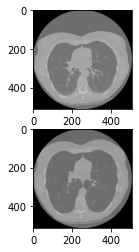

In [84]:
plt.subplot(2,1,1)
plt.imshow(one, cmap = 'gray')
plt.subplot(2,1,2)
plt.imshow(three, cmap = 'gray')


In [81]:
i = 2
lal = np.array([0.633,   0.633,   2.5], dtype = np.float32)
values[i].shape

(512, 512, 119)

In [82]:
header_info[4]['pixdim']

array([-1.  ,  0.63,  0.63,  2.5 ,  0.  ,  0.  ,  0.  ,  0.  ],
      dtype=float32)

In [83]:
    ni_img_i = nib.Nifti1Image(values[i], affine=np.eye(4), header = header_info[4])
    ni_img_i.header['pixdim'][1:4] = lal
    nib.save(ni_img_i, f'Ada_NiftiChallenge/{name[i]}_iBHCT.nii.gz')
    
    ni_img_e = nib.Nifti1Image(values_e[i], affine=np.eye(4), header = header_info[4])
    ni_img_e.header['pixdim'][1:4] = lal
    nib.save(ni_img_e, f'Ada_NiftiChallenge/{name[i]}_eBHCT.nii.gz')

In [124]:
ni_img.header['pixdim'][1:4] = header_info[0]['pixdim'][1:4]

In [125]:
ni_img.header['pixdim']

array([1.  , 0.62, 0.62, 2.5 , 0.  , 0.  , 0.  , 0.  ], dtype=float32)

In [46]:
header_info[i]['pixdim'][1:4]

array([0.97, 0.97, 2.5 ], dtype=float32)

In [48]:
np.array([0.2, 0.2, 0.2], dtype = np.float32)

array([0.2, 0.2, 0.2], dtype=float32)